## 0. Computer vision in PyTorch
+ torchvision.dataset : For loading data
+ torchvision.models: For pretrained computer vision models
+ torchvision.trainsforms: Functions for manupulating your vision data for ML model usage suitability
+ torch.utils.data.Dataset: Base dataset class for PyTorch
+ torch.utils.data.DataLoader: Creates a Python iterable over a dataset

In [117]:
# Import pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt


In [118]:
# Setting the device
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Getting a dataset
(Fashion Mnist)

In [119]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "/content/data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),#How do we want to transfer data?
    target_transform=None # How do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root='/content/data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [120]:
len(train_data), len(test_data)

(60000, 10000)

In [121]:
# See the first trining example
image, label = train_data[0]
image[:, :3, :3], label

(tensor([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]),
 9)

In [122]:
# Classes:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [123]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [124]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [125]:
# Check the sape of out image
image.shape, label

(torch.Size([1, 28, 28]), 9)

## 1.2 Visualize the data

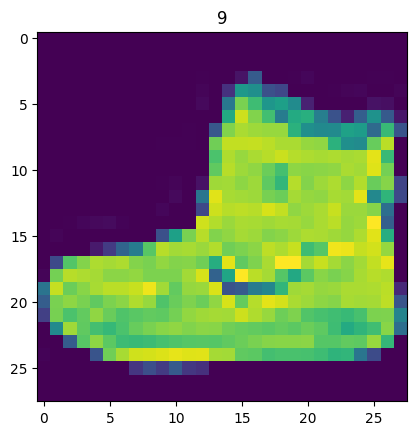

In [126]:
# Visualize
plt.imshow(image.squeeze());
plt.title(label);

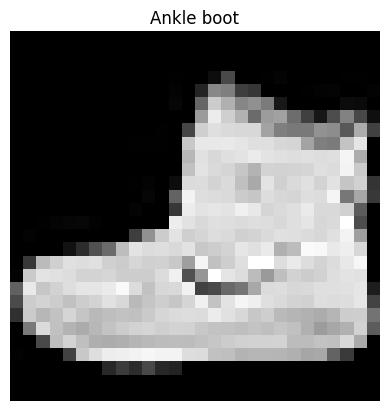

In [127]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False);

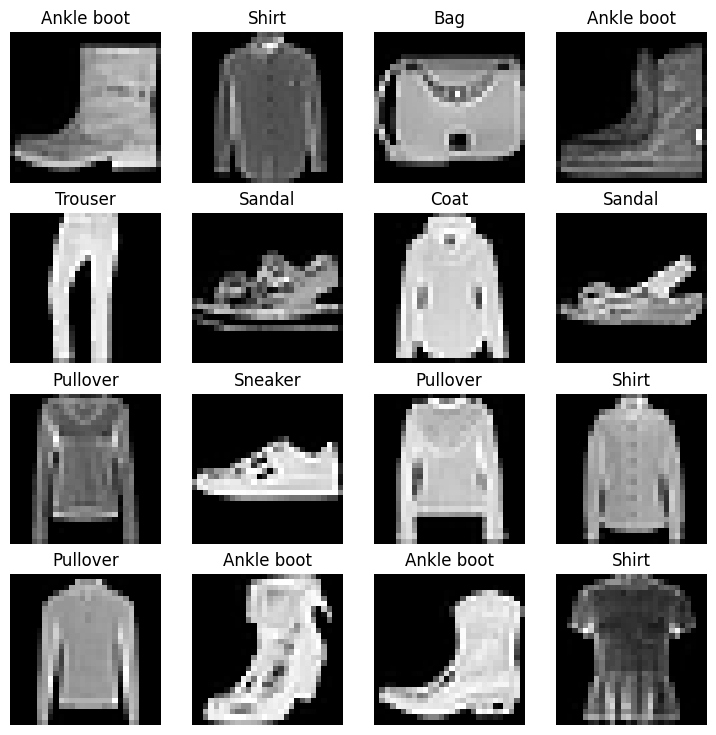

In [128]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2.prepare DataLoader

In [129]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: /content/data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: /content/data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [130]:
from torch.utils.data import DataLoader # Kinda like

BATCH_SIZE = 32
# Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bc953ef80d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7bc95589acd0>)

In [131]:
# Let's check out what we created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7bc953ef80d0>, <torch.utils.data.dataloader.DataLoader object at 0x7bc95589acd0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [132]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

IMG_SIZE: torch.Size([1, 28, 28])
Label: 6, Label_size: torch.Size([])


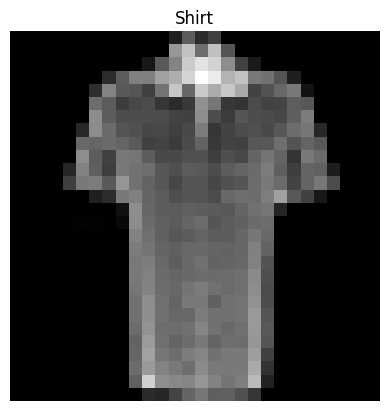

In [133]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label= train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.axis(False)
plt.title(class_names[label])
print(f"IMG_SIZE: {img.shape}")
print(f"Label: {label}, Label_size: {label.shape}");

### 3. Model 0:Build a base model

In [134]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
print(x.shape)
# Flatten the sample
output = flatten_model(x)
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [135]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape:int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, inputs:torch.Tensor)->torch.Tensor:
    return self.layer_stack(inputs)


In [136]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # Output of the flatten layer(28*28)
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [137]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 3.1 SetUp loss, optimizer and evaluation metrics


In [138]:
# Loss:
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                                lr= 0.01)

In [139]:
# Import helper_fnctions
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py
from helper_functions import plot_decision_boundary, accuracy_fn

--2025-02-04 09:56:06--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2025-02-04 09:56:06 (89.7 MB/s) - ‘helper_functions.py.1’ saved [10160/10160]



### 3.2 Creating a function to time our experiment


In [140]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time"""

  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [141]:
start_time = timer()
### Some code
end_time = timer()

print_train_time(start= start_time, end= end_time, device = 'cpu')

Train time on cpu: 0.000 seconds


2.7224000405112747e-05

### 3.3 Creating a training loop and tranining a model on batches of data
1. Loop through epochs.
2. Loop through tranining batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing styeps, calculate the test loss *per batch*
4. Print out what's happening.
5. Time it all.

In [142]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)

train_time_start_on_cpu = timer()

# Set a number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}, \n -------')
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumlate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length og train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_0(X_test)

      # 2. Caculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true= y_test, y_pred = test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_acc /= len(test_dataloader)
    test_loss /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f}| Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

  # Calculate training time
  train_time_end_on_cpu = timer()
  total_train_time_model_0 = print_train_time(train_time_start_on_cpu,
                                              train_time_end_on_cpu,
                                              device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0, 
 -------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.9096| Test loss: 0.6290, Test acc: 78.6342
Train time on cuda:0: 11.253 seconds
Epoch: 1, 
 -------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5573| Test loss: 0.5441, Test acc: 81.1302
Train time on cuda:0: 25.869 seconds
Epoch: 2, 
 -------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5027| Test loss: 0.5137, Test acc: 81.9988
Train time on cuda:0: 41.763 seconds


## 4. Make predictions and get Model 0 result

In [143]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returning a dictionart containing the result of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Acculumate the loss and acc values per batch
      loss += loss_fn(y_pred, y)

      acc += accuracy_fn(y, y_pred.argmax(dim=1))

      # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)\

  return {"Model_name": model.__class__.__name__,# Only works when model was created with class
          "Model_loss": loss.item(),
          "Model_acc": acc}
# Calculate model 0 results on test dataset
model_0_results = eval_model(model= model_0,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'FashionMNISTModelV0',
 'Model_loss': 0.5136752128601074,
 'Model_acc': 81.9988019169329}

## 5. Building a better model with non linearity


In [144]:
# Create the model
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, inputs: torch.Tensor) ->torch.Tensor:
    return self.layer_stack(inputs)


In [145]:
# Create an instance of model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 28 * 28,
                              hidden_units = 10,
                              output_shape = len(train_data.classes)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 SetUp loss, optimizer and evaluateion metrics

In [146]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() # How wrong our model is?
optimizer = torch.optim.SGD(params=model_1.parameters(),# Tries to update model params to decrease the loss
                             lr=0.1)


In [147]:
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.2 Functionizing training and evaluation/testing loops

In [148]:
def train_step(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a tranining with model trying to learn on data loader."""
  train_loss, train_acc= 0, 0

  # Putting model into tranining mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    model.train()
    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss and train acc
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumlate train loss
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # Print out what's happening
    #if batch % 400 == 0:
      #print(f"Looked at {batch * len(X)}/{len(data_loader.dataset)} samples")

  # Divide total train loss by length og train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [149]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):

  """Performs a testing loop step on model going over data_loader"""
  test_loss, test_acc = 0, 0
  # Put the model into eval mode
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))# Go from logits-> prediction labels

    # Adjust metrcis and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.5f}| Test acc: {test_acc :.2f}%")

In [150]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
from tqdm.auto import tqdm
train_time_start_on_gpu = timer()
# set epochs
epochs = 3
# Create a optimization and evaluation loop using train_setp() and test_step()

for epoch in tqdm(range(epochs)):
  print(f"\n---------------------------Epoch: {epoch} ")
  train_step(model_1,
             data_loader = train_dataloader,
             optimizer = optimizer,
             loss_fn=loss_fn,
             accuracy_fn=  accuracy_fn,
             device= device)
  test_step(model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)


train_time_stop_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu,
                                            train_time_stop_on_gpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]


---------------------------Epoch: 0 
Train Loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636| Test acc: 65.00%

---------------------------Epoch: 1 
Train Loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227| Test acc: 73.91%

---------------------------Epoch: 2 
Train Loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500| Test acc: 75.02%
Train time on cuda: 37.424 seconds


In [151]:
model_0_results

{'Model_name': 'FashionMNISTModelV0',
 'Model_loss': 0.5136752128601074,
 'Model_acc': 81.9988019169329}

In [152]:
total_train_time_model_0

41.76326917299957

In [153]:
total_train_time_model_1

37.42388593099986

In [154]:
# Get model_1 results divtionary
model_1_results = eval_model(model=model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn )

  0%|          | 0/313 [00:00<?, ?it/s]

In [155]:
model_1_results

{'Model_name': 'FashionMNISTModelV1',
 'Model_loss': 0.6850008964538574,
 'Model_acc': 75.01996805111821}

Some times running on GPU doesn't mean faster in particular...
To gain more information about this can check:
https://horace.io/brrr_intro.html

## Model 2: building a Convolutional Neural Network(CNN)

In [156]:
# Create a convulituinal neural network
class FashionMNISTModelV2(nn.Module):
  """Model architecture that replicates the TinyVGG
     Model from the CNN Explainer website"""
  def __init__(self,
              input_shape:int,
              hidden_units: int,
              output_shape:int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride =1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 7 * 7,
                  out_features=output_shape )
    )
  def forward (self, inputs):
    x = self.conv_block_1(inputs)
    # print(f"Outputshape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Outputshape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Outputshape of classifier: {x.shape}")
    # print(x.shape)
    return x

In [157]:
image.shape

torch.Size([1, 28, 28])

In [158]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units=10,
                              output_shape= len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 steppingthrough nn.Conv2d

In [159]:
torch.manual_seed(42)

# Create a batch of image
images = torch.randn(size=(32, 3, 64, 64)).to(device)
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [160]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size= (3, 3),
                       stride=1,
                       padding=0).to(device)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8552e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

### 7.2 Stepping throuhg `nn.MaxPool2d`



In [161]:
# Print out original image shape
print(f"Test image: {test_image.shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2).to(device)

print(f"shape with max_pool2d: {max_pool_layer(test_image).shape}")

Test image: torch.Size([3, 64, 64])
shape with max_pool2d: torch.Size([3, 32, 32])


In [162]:
# Create a random tensor with a similar number of dimentions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Tensor without the MaxPool2d: {random_tensor}")
print(f"Tensor with the MaxPool2d: {max_pool_layer(random_tensor)}")

Tensor without the MaxPool2d: tensor([[[[0.4963, 0.0045],
          [0.5534, 0.1379]]]])
Tensor with the MaxPool2d: tensor([[[[0.5534]]]])


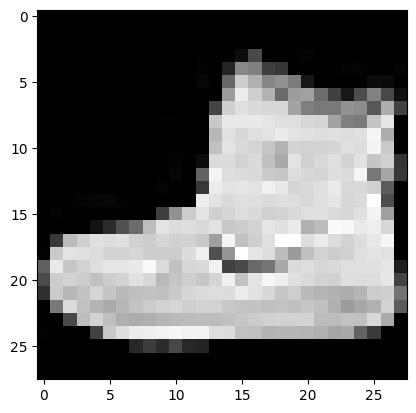

In [163]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(), cmap='gray');

In [164]:
rand_image_tensor = torch.randn(size=(1, 28, 28)).to(device)
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [165]:
# Pass image through the model
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 7.3 Setup a loss function and optimizer for `model_2`

In [166]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(), lr= 0.1)

### 7.4 Training and Testing model_2 using Training and Testing functions


In [167]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Messure the time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}-------------------\n")

  # Train
  train_step(model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer=optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  # Test
  test_step(model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn= accuracy_fn,
            device = device)
  print("\n")
train_time_end_model_2= timer()

train_time_model_2 = print_train_time(train_time_start_model_2,
                                      train_time_end_model_2,
                                      device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0-------------------

Train Loss: 0.59751 | Train acc: 78.27%
Test loss: 0.39755| Test acc: 85.71%


Epoch: 1-------------------

Train Loss: 0.36084 | Train acc: 86.99%
Test loss: 0.36283| Test acc: 86.55%


Epoch: 2-------------------

Train Loss: 0.32405 | Train acc: 88.27%
Test loss: 0.32246| Test acc: 88.33%


Train time on cuda: 34.769 seconds


In [168]:
# Get model_2 resutls
model_2_results = eval_model(model=model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'FashionMNISTModelV2',
 'Model_loss': 0.32246389985084534,
 'Model_acc': 88.32867412140575}

In [169]:
model_0_results

{'Model_name': 'FashionMNISTModelV0',
 'Model_loss': 0.5136752128601074,
 'Model_acc': 81.9988019169329}

# 8. Compare model results and traininig time

In [170]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,Model_name,Model_loss,Model_acc
0,FashionMNISTModelV0,0.513675,81.998802
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.322464,88.328674


In [171]:
# Compare training time
compare_results["training_time"] =[total_train_time_model_0,
                                   total_train_time_model_1,
                                   train_time_model_2]
compare_results

,Model_name,Model_loss,Model_acc,training_time
0,FashionMNISTModelV0,0.513675,81.998802,41.763269
1,FashionMNISTModelV1,0.685001,75.019968,37.423886
2,FashionMNISTModelV2,0.322464,88.328674,34.768868


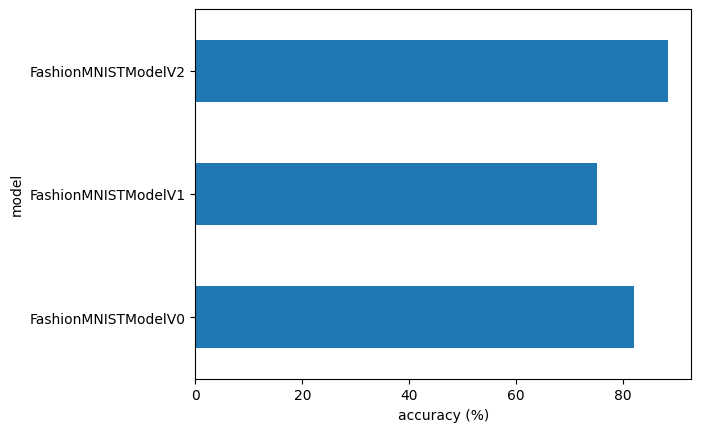

In [172]:
# Visualize our model Results
compare_results.set_index("Model_name")['Model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel("model");

## 9. Make and Evaluate random predictoins with best model

In [173]:
def make_prediction(model: torch.nn.Module,
                    data: list,
                    device: torch.device):
    pred_probs = []  # Use a list to store predictions
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and send to device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Move prediction probability to CPU and store in list
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs_list to turn list into tensor
    return torch.stack(pred_probs)


In [174]:
import random
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

  # View the first sample shape
test_samples[0].shape



torch.Size([1, 28, 28])

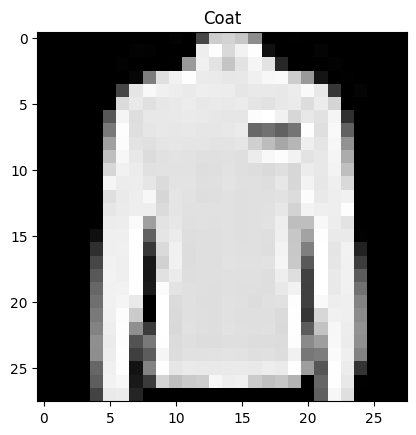

In [175]:
 plt.imshow(test_samples[0].squeeze(), cmap='gray');
 plt.title(class_names[test_labels[0]]);

In [176]:
# Make predictoins
pred_probs = make_prediction(model= model_2,
                              data=test_samples,
                             device= device)

# View first two predictions probabilities
pred_probs[:2]

tensor([[8.2934e-04, 1.5230e-05, 9.3567e-02, 8.6206e-05, 4.4729e-01, 1.7719e-06,
         4.5751e-01, 9.4968e-07, 6.8990e-04, 5.6102e-06],
        [8.0455e-03, 5.3374e-04, 3.2012e-02, 6.4148e-04, 3.1321e-02, 7.8200e-05,
         9.2652e-01, 3.6382e-05, 6.0069e-04, 2.0922e-04]])

In [177]:
test_labels

[4, 6, 4, 1, 2, 3, 0, 3, 7]

In [178]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 6, 4, 1, 2, 3, 0, 6, 7])

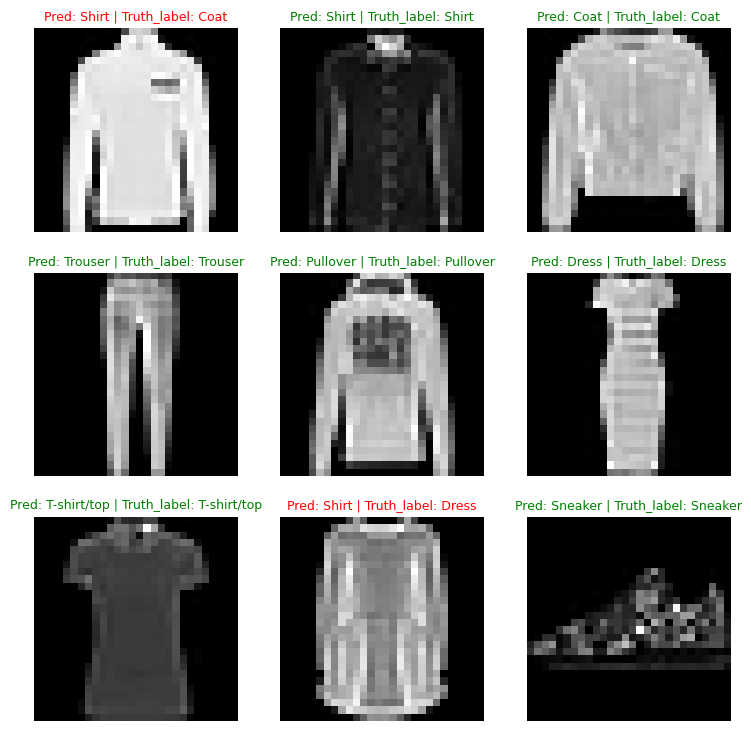

In [179]:
# Plot predicitons
plt.figure(figsize = (9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Createsubplot
  plt.subplot(nrows,ncols, i + 1)

  # Plot the target_image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction label
  pred_label = class_names[pred_classes[i]]

  # Get the truth label(in text form)
  truth_label =class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth_label: {truth_label}"

  # Check for the equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=9, c='g')
  else:
    plt.title(title_text, fontsize=9, c= 'r')
  plt.axis(False)

# 10. Making a confusion matrix
1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMetrix`

In [180]:
import mlxtend

In [181]:
mlxtend.__version__

'0.23.4'

In [182]:
import torch
from tqdm.auto import tqdm  # Correct import

# Initialize an empty list for predictions
y_preds = []

# Set model to evaluation mode
model_2.eval()

# Disable gradient calculation for inference
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making Predictions..."):
        # Move inputs to the correct device (CPU/GPU)
        X, y = X.to(device), y.to(device)

        # Forward pass through the model
        y_logit = model_2(X)  # Raw logits

        # Convert logits to prediction probabilities and then to labels
        y_pred = torch.softmax(y_logit, dim=0).argmax(dim=1)

        # Move predictions to CPU and store in the list
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a single tensor
y_pred_tensor = torch.cat(y_preds)

# Print first 10 predictions
print(y_pred_tensor[:10])


Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])


In [183]:
len(y_pred_tensor)

10000

In [184]:
# See if all poachages are installed and if not, install them...
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version's bad"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend versoin: {mlxtend.__version__}")

mlxtend version: 0.23.4


In [185]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare preictoins to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
comfmat_tensor = confmat(preds=y_pred_tensor,
                         target = test_data.targets)

comfmat_tensor

tensor([[650,   4,  52,  69,  11,   1, 207,   0,   6,   0],
        [ 13, 792,  10, 145,  34,   0,   4,   1,   0,   1],
        [  7,   3, 808,   9, 103,   0,  68,   0,   2,   0],
        [ 29,  11,  28, 846,  46,   0,  36,   0,   2,   2],
        [ 10,   6, 132,  44, 691,   0, 112,   0,   5,   0],
        [  8,   1,   3,   9,   1, 855,   4,  48,  52,  19],
        [ 79,   5, 128,  61,  87,   0, 630,   0,  10,   0],
        [  2,   0,   0,   0,   0,  33,   0, 889,  10,  66],
        [ 14,   2,  21,  14,  12,   7,  30,   7, 892,   1],
        [  0,   0,   1,   2,   1,  15,   2,  62,  14, 903]])

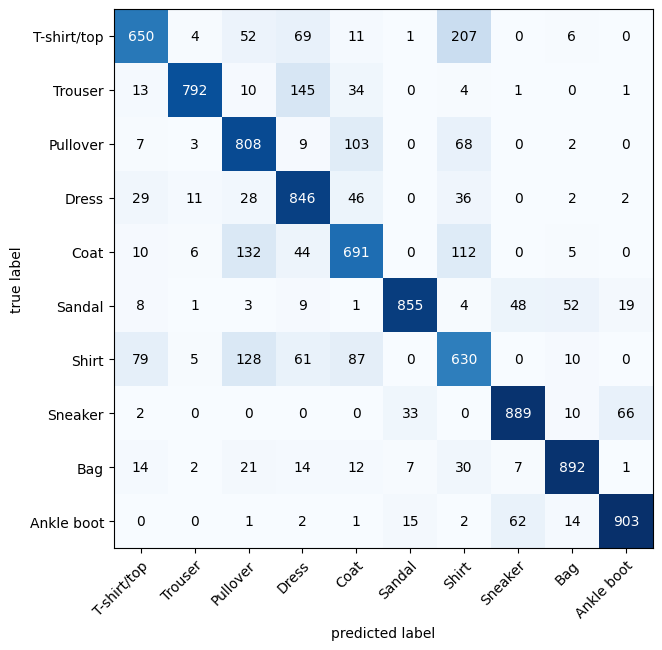

In [186]:
# 3. plot the confusion metrics
fig, ax = plot_confusion_matrix(
    conf_mat = comfmat_tensor.numpy(),
    class_names = class_names,
    figsize= (10, 7)

)

# 10. Saving and loading the model

In [187]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = '/content' / MODEL_PATH  / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f= MODEL_SAVE_PATH)

Saving model to: /content/Models/03_pytorch_computer_vision_model_2.pth


In [188]:
# Create a new instance of model 2
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))
# Loade in the saveed state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

<ipython-input-188-ec0f53b0899e>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [190]:
model_2_results

{'Model_name': 'FashionMNISTModelV2',
 'Model_loss': 0.32246389985084534,
 'Model_acc': 88.32867412140575}

In [191]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn=accuracy_fn
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [192]:
loaded_model_2_results

{'Model_name': 'FashionMNISTModelV2',
 'Model_loss': 0.32246389985084534,
 'Model_acc': 88.32867412140575}

In [196]:
# Cehck if model results are cloase to eachother?
torch.isclose(torch.tensor(model_2_results["Model_loss"]),
               torch.tensor(loaded_model_2_results["Model_loss"]),
              atol=1e-02)

tensor(True)

# THE END.